<a href="https://colab.research.google.com/github/Chintan3627/Self-driving-Car/blob/main/self_driving_car.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!git clone https://github.com/rslim087a/track

Cloning into 'track'...
remote: Enumerating objects: 12163, done.
remote: Total 12163 (delta 0), reused 0 (delta 0), pack-reused 12163
Receiving objects: 100% (12163/12163), 156.98 MiB | 16.96 MiB/s, done.
Updating files: 100% (12160/12160), done.


In [3]:
import os
import numpy as np
import matplotlib.image as mping
import matplotlib.pyplot as plt
from tensorflow import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import *
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from imgaug import augmenters as iaa
import cv2
import pandas as pd
import ntpath
import random

In [4]:
datadir = '/content/track'
columns = ["center","left","right","steering","throttle","reverse","speed"]
data = pd.read_csv(os.path.join(datadir,'driving_log.csv'),names=columns)


In [5]:
data.head()

,center,left,right,steering,throttle,reverse,speed
0,C:\Users\Amer\Desktop\new_track\IMG\center_201...,C:\Users\Amer\Desktop\new_track\IMG\left_2018_...,C:\Users\Amer\Desktop\new_track\IMG\right_2018...,0.0,0.0,0.0,0.649786
1,C:\Users\Amer\Desktop\new_track\IMG\center_201...,C:\Users\Amer\Desktop\new_track\IMG\left_2018_...,C:\Users\Amer\Desktop\new_track\IMG\right_2018...,0.0,0.0,0.0,0.627942
2,C:\Users\Amer\Desktop\new_track\IMG\center_201...,C:\Users\Amer\Desktop\new_track\IMG\left_2018_...,C:\Users\Amer\Desktop\new_track\IMG\right_2018...,0.0,0.0,0.0,0.622910
3,C:\Users\Amer\Desktop\new_track\IMG\center_201...,C:\Users\Amer\Desktop\new_track\IMG\left_2018_...,C:\Users\Amer\Desktop\new_track\IMG\right_2018...,0.0,0.0,0.0,0.619162
4,C:\Users\Amer\Desktop\new_track\IMG\center_201...,C:\Users\Amer\Desktop\new_track\IMG\left_2018_...,C:\Users\Amer\Desktop\new_track\IMG\right_2018...,0.0,0.0,0.0,0.615438


In [6]:
def  path_leaf(path):
  head,tail = ntpath.split(path)
  return tail
data['center'] = data['center'].apply(path_leaf)
data['left'] = data['left'].apply(path_leaf)
data['right'] = data['right'].apply(path_leaf)

<BarContainer object of 25 artists>

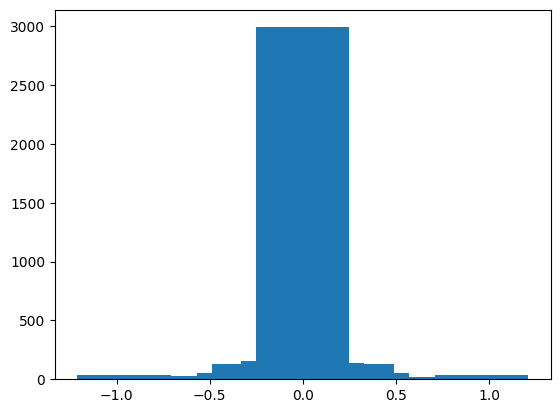

In [7]:
num_bins = 25
hist,bins = np.histogram(data['steering'],num_bins)
center =  (bins[:-1]+bins[1:]) * 0.5
plt.bar(center,hist,width= 0.5)

In [8]:
data.shape

(4053, 7)

In [9]:
remove_list = []
samples_per_bin = 400
for j in range(num_bins):
  list_ = []
  for i in range(len(data['steering'])):
    if data['steering'][i] >bins[j] and data['steering'][i]<=bins[j+1]:
      list_.append(i)
  list_ = shuffle(list_)
  list_ = list_[samples_per_bin:]
  remove_list.extend(list_)

In [10]:
data.drop(data.index[remove_list],inplace =True)

In [11]:
data.shape

(1463, 7)

In [12]:
 def load_img_steering(datadir,df):
  image_path = []
  steering = []
  for i in range(len(data)):
    indexed_data = data.iloc[i]
    center ,left,right = indexed_data[0],indexed_data[1],indexed_data[2]
    image_path.append(os.path.join(datadir,center.strip()))
    steering.append(float(indexed_data[3]))
    #left image path
    image_path.append(os.path.join(datadir,left.strip()))
    steering.append(float(indexed_data[3])*0.15)
    #right image path
    image_path.append(os.path.join(datadir,left.strip()))
    steering.append(float(indexed_data[3])*-0.15)
  image_path = np.asarray(image_path)
  steering = np.asarray(steering)
  return image_path,steering


In [13]:
image_paths, steerings = load_img_steering(datadir + "/IMG",data)

In [14]:
len(image_paths)

4389

In [15]:
X_tarin ,X_test,y_train,y_test = train_test_split(image_paths,steerings,test_size = 0.2,random_state=6)

In [16]:
def zoom(image):
  zoom = iaa.Affine(scale=(1,1.3))
  image = zoom.augment_image(image)
  return image

In [17]:
image =  image_paths[random.randint(0,1000)]
orignal_image =  mping.imread(image)
zoomed_image  =  zoom(orignal_image)

Text(0.5, 1.0, 'zoomed image')

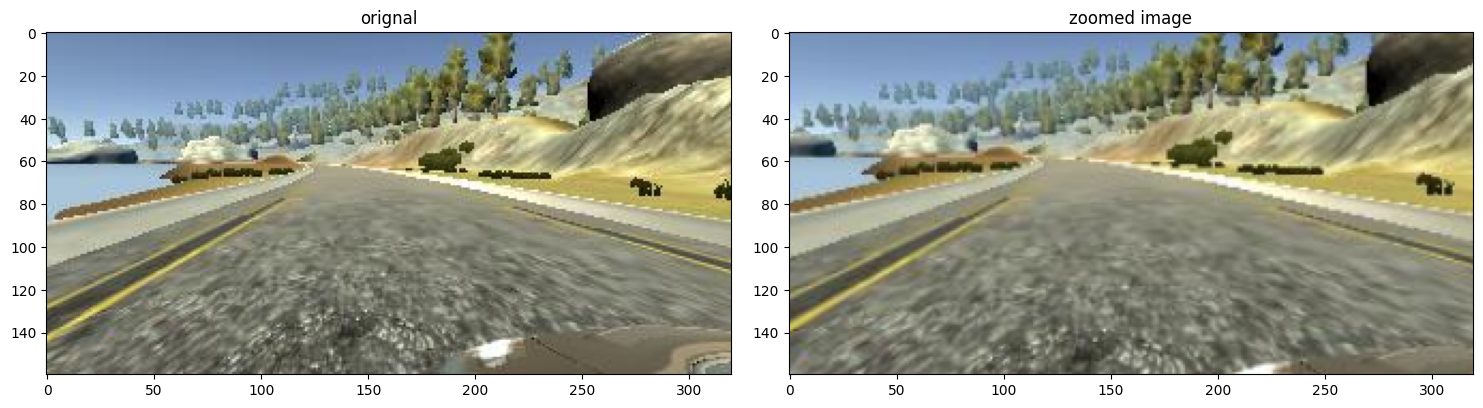

In [18]:
fig,axs = plt.subplots(1,2,figsize=(15,10))
fig.tight_layout()
axs[0].imshow(orignal_image)
axs[0].set_title("orignal")
axs[1].imshow(zoomed_image)
axs[1].set_title("zoomed image")

In [19]:
def pan(image):
  pan =  iaa.Affine(translate_percent={"x":(-0.1,0.1),"y":(-0.1,0.1)})
  image =  pan.augment_image(image)
  return image

In [20]:
image =  image_paths[random.randint(0,1000)]
orignal_image =  mping.imread(image)
pan_image  =  pan(orignal_image)

Text(0.5, 1.0, 'pan_image')

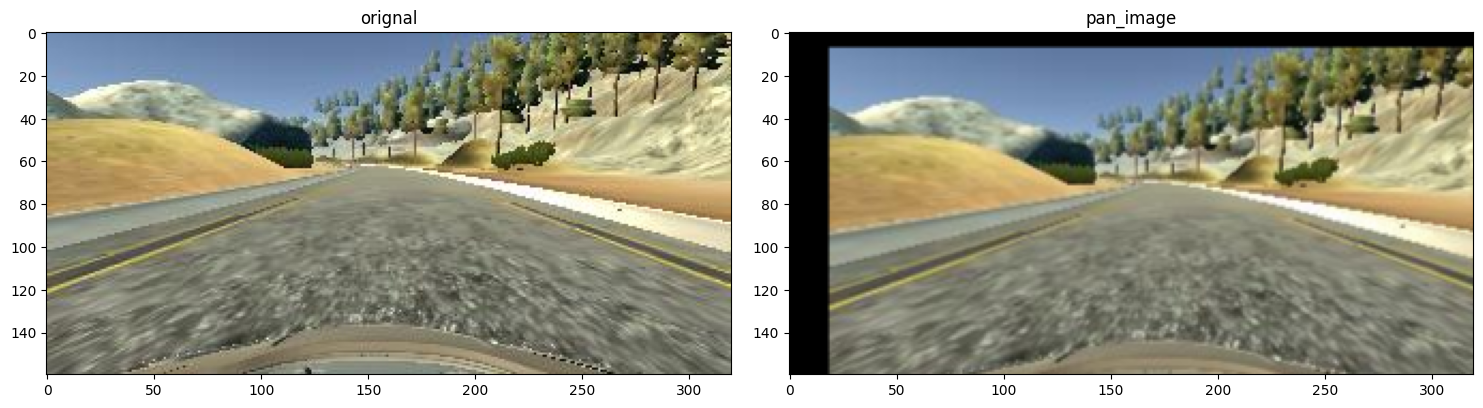

In [21]:
fig,axs = plt.subplots(1,2,figsize=(15,10))
fig.tight_layout()
axs[0].imshow(orignal_image)
axs[0].set_title("orignal")
axs[1].imshow(pan_image)
axs[1].set_title("pan_image")

In [22]:
def img_random_brightness(image):
  brightness =  iaa.Multiply((0.2,1.2))
  image =  brightness.augment_image(image)
  return image

In [23]:
image =  image_paths[random.randint(0,1000)]
orignal_image =  mping.imread(image)
image_brightness  =  img_random_brightness(orignal_image)

Text(0.5, 1.0, 'image_brightness')

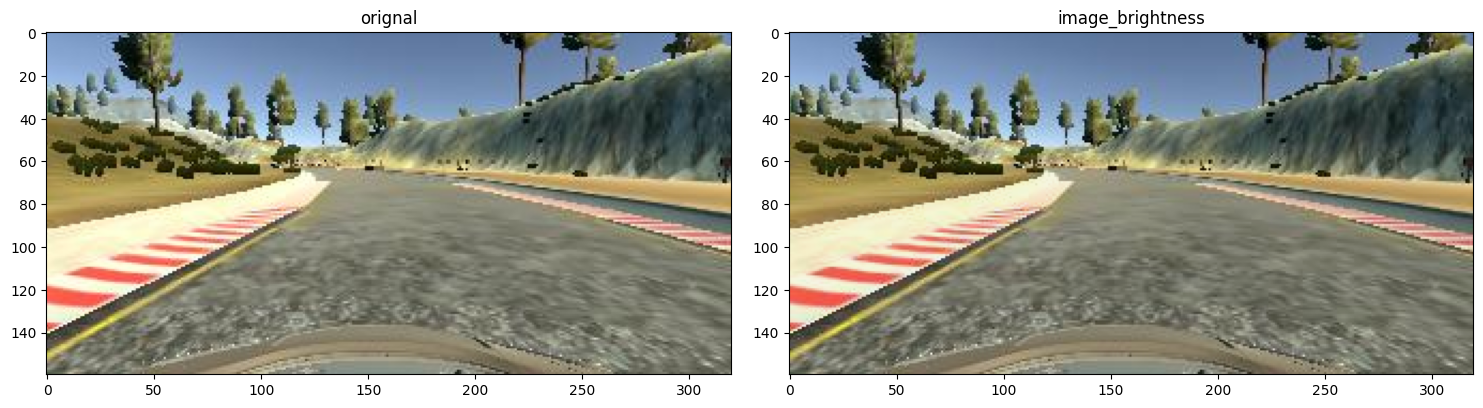

In [24]:
fig,axs = plt.subplots(1,2,figsize=(15,10))
fig.tight_layout()
axs[0].imshow(orignal_image)
axs[0].set_title("orignal")
axs[1].imshow(image_brightness)
axs[1].set_title("image_brightness")

In [25]:
def image_random_flip(image,steepingangel):
  image =  cv2.flip(image,1)
  steepingangel = -steepingangel
  return image , steepingangel

Text(0.5, 1.0, 'pan_image')

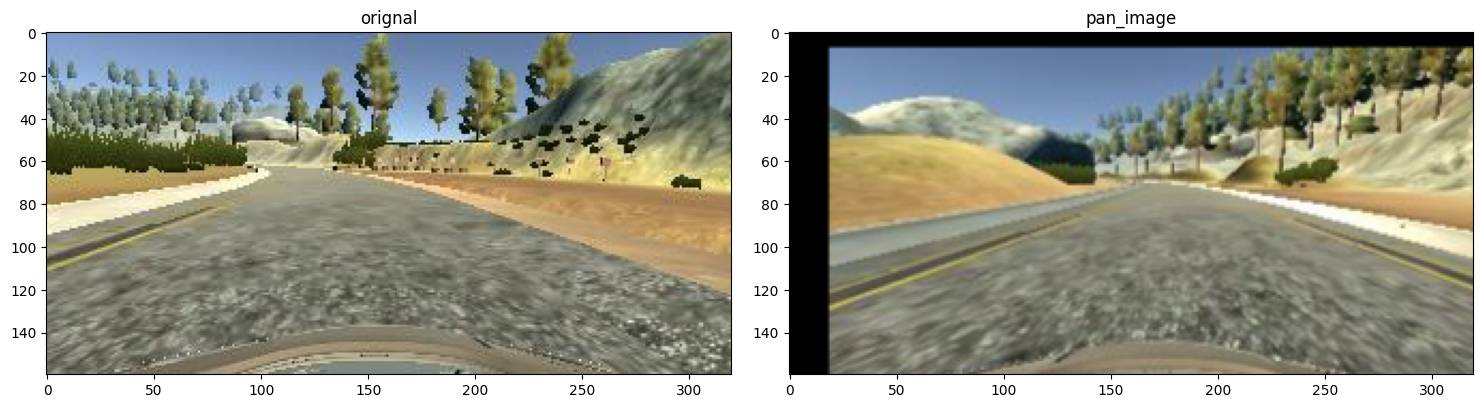

In [26]:
image =  image_paths[random.randint(0,1000)]
orignal_image =  mping.imread(image)
image_brightness  =  image_random_flip(orignal_image,1)
fig,axs = plt.subplots(1,2,figsize=(15,10))
fig.tight_layout()
axs[0].imshow(orignal_image)
axs[0].set_title("orignal")
axs[1].imshow(pan_image)
axs[1].set_title("pan_image")

In [27]:
def random_augment(image,steering_angle):
  image = mping.imread(image)
  if np.random.rand() < 0.5:
    image = pan(image)
  if np.random.rand() < 0.5:
    image = zoom(image)
  if np.random.rand() < 0.5:
    image = img_random_brightness(image)
  if np.random.rand() < 0.5:
    image ,steering_angle= image_random_flip(image,steering_angle)

  return image,steering_angle

In [28]:
def img_preprocess(img):
  img = img[60:135,:,:]
  img = cv2.cvtColor(img,cv2.COLOR_RGB2YUV)
  img = cv2.GaussianBlur(img,(3,3),0)
  img = cv2.resize(img,(200,66))
  img = img/255
  return img

Text(0.5, 1.0, 'preprocessed_image')

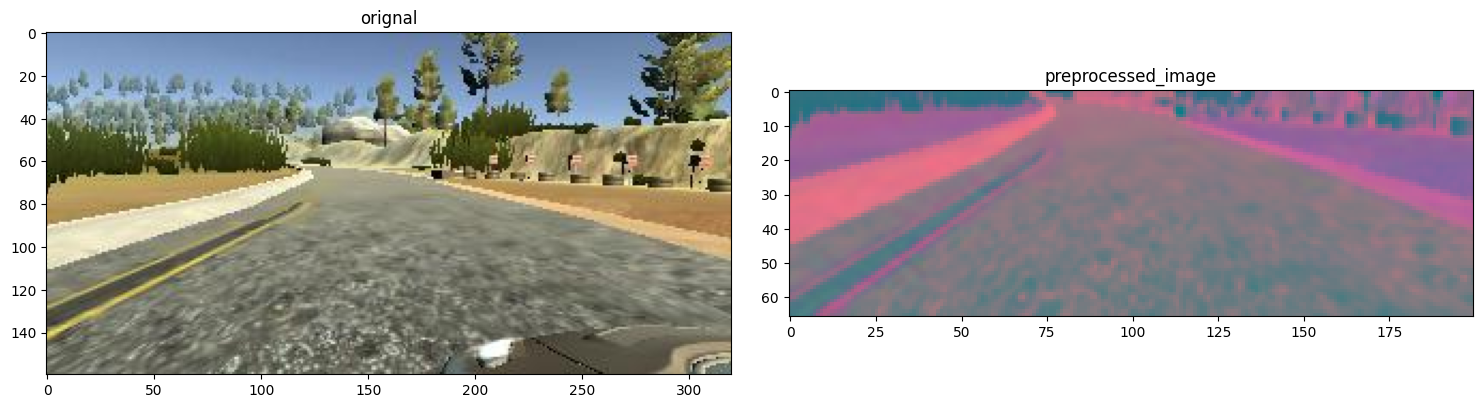

In [29]:
image = image_paths[200]
orignal_image = mping.imread(image)
preprocessed_image =  img_preprocess(orignal_image)
fig,axs = plt.subplots(1,2,figsize=(15,10))
fig.tight_layout()
axs[0].imshow(orignal_image)
axs[0].set_title("orignal")
axs[1].imshow(preprocessed_image)
axs[1].set_title("preprocessed_image")

In [43]:
def batch_genreter(image_paths,steerings_ang,batch_size,istraing):
  while True:
    batch_img = []
    batch_steering = []

    for i in range(batch_size):

      randome_index = random.randint(0,len(image_paths)-1)
      if istraing:
        img,steerings = random_augment(image_paths[randome_index],steerings_ang[randome_index])
      else:
        img  =  mping.imread(image_paths[randome_index])
        steerings = steerings_ang[randome_index]
      img = img_preprocess(img)
      batch_img.append(img)
      batch_steering.append(steerings)
    yield (np.asarray(batch_img),np.asarray(batch_steering))


In [31]:
X,y = next(batch_genreter(X_tarin,y_train,1,1))

In [66]:
X.shape

(1, 66, 200, 3)

In [32]:
def nvidia_model():
  model = Sequential()
  model.add(Conv2D(24,(5,5),strides=(2,2),input_shape=(66,200,3),activation='elu'))
  model.add(Conv2D(36,(5,5),strides=(2,2),activation='elu'))
  model.add(Conv2D(48,(5,5),strides=(2,2),activation='elu'))
  model.add(Conv2D(64,(5,5),strides=(2,2),activation='elu'))
  model.add(Flatten())
  model.add(Dense(100,activation='elu'))
  model.add(Dense(50,activation='elu'))
  model.add(Dense(10,activation='elu'))
  model.add(Dense(1,activation='elu'))
  optimizer =  tf.keras.optimizers.Adam(learning_rate=1e-3)
  model.compile(loss='mse',optimizer=optimizer)
  return model

In [33]:
nvidia_model().summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 31, 98, 24)        1824      
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 47, 36)        21636     
                                                                 
 conv2d_2 (Conv2D)           (None, 5, 22, 48)         43248     
                                                                 
 conv2d_3 (Conv2D)           (None, 1, 9, 64)          76864     
                                                                 
 flatten (Flatten)           (None, 576)               0         
                                                                 
 dense (Dense)               (None, 100)               57700     
                                                                 
 dense_1 (Dense)             (None, 50)                5

In [44]:
history = nvidia_model().fit_generator(
    batch_genreter(X_tarin,y_train,100,1),
    steps_per_epoch=300,
    epochs = 4,
    validation_data=batch_genreter(X_test,y_test,100,0),
    validation_steps=200,
    verbose=1,
    shuffle=1

)

<ipython-input-44-55dd7cb5005d>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = nvidia_model().fit_generator(


Epoch 1/4
300/300 [==============================] - 146s 442ms/step - loss: 0.0855 - val_loss: 0.0326
Epoch 2/4
300/300 [==============================] - 130s 434ms/step - loss: 0.0352 - val_loss: 0.0331
Epoch 3/4
300/300 [==============================] - 114s 381ms/step - loss: 0.0363 - val_loss: 0.0328
Epoch 4/4
300/300 [==============================] - 130s 433ms/step - loss: 0.0351 - val_loss: 0.0336


In [46]:
nvidia_model().save('selfdrivingcar.h5')
from google.colab import files
files.download('selfdrivingcar.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>